## NowSecure Analysis
This notebook serves as a quick analysis guide for cleaning the Reports data from the NowSecure dataset

### Methodology
1. Prepare your files by combining all of the json files into one folder for easy access
2. Import necessary packages
3. Collect all of these file names into a list
4. Create a pandas DataFrame to store all of the combined information
5. Iterate through each file in the file list
6. For each file, create a new row in the DataFrame for the Title, Score, and the Common Vulnerability Scoring System (cvss) score for each of the task names (checkId)
7. Since the score is our predictor, drop any row that does not have a score
8. Replace NaNs with 0.0 and save the object as a pickle file

### TODO
1. Figure out a way to split the data into multiple sets that all have a subset of features that are not zero
2. Analyze the features to see which ones correspond the most with scores
3. Visualize the findings

In [ ]:
# Import statements
import json
import os
import pandas as pd
import numpy as np

In [ ]:
# Collect all json files
data_path = "Data"
json_list = [f for f in os.listdir(data_path) if f.endswith('.json')]
json_list[:5]

In [ ]:
with open(os.path.join(data_path, json_list[2])) as json_fd:
    json_obj = json.load(json_fd)

json_obj

In [ ]:
json_obj[0]['title']
json_obj[0]['assessment']
json_obj[0]['assessment'].keys()
json_obj[0]['assessment']['report']

In [ ]:
json_obj[0]['assessment']['report']['score']

In [ ]:
json_obj[0]['assessment']['report']['findings']

In [ ]:
apps_scores = pd.DataFrame()
app_row = {}
app_row['App_Title'] = json_obj[0]['title']
for task in json_obj[0]['assessment']['report']['findings']:
    app_row[task['checkId']] = task['cvss']
app_row['Score'] = json_obj[0]['assessment']['report']['score']

apps_scores = apps_scores.append(app_row, ignore_index=True)
apps_scores

In [ ]:
# Run a for loop on all the json files
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

apps_scores = pd.DataFrame()

for json_file in json_list:
    with open(os.path.join(data_path, json_file)) as json_fd:
        json_obj = json.load(json_fd)
    app_row = {}
    try:
        app_row['App_Title'] = json_obj[0]['title']
        for task in json_obj[0]['assessment']['report']['findings']:
            app_row[task['checkId']] = task['cvss']
        app_row['Score'] = json_obj[0]['assessment']['report']['score']
    except:
        continue

    apps_scores = apps_scores.append(app_row, ignore_index=True)

apps_scores = apps_scores.replace(0.0, np.nan)

In [ ]:
# There are already too many columns. Drop any columns that have more than 10 NaNs.
apps_scores = apps_scores[~apps_scores['Score'].isnull()]
#apps_scores.dropna(axis=1, thresh=15)
apps_scores

In [ ]:
# Output apps_scores as a pickle file
apps_scores.replace(np.nan, 0.0)
apps_scores.to_pickle('apps_scores.pkl')
# To read in the pickle file, use the following commands
# import pandas as pd
# apps_scores = pd.read_pickle('apps_scores.pkl')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
apps_scores = pd.read_pickle('drive/MyDrive/NowSecure/apps_scores.pkl')

In [ ]:
# apps_scores.to_csv("app_scores.csv")

In [ ]:
apps_scores.Score = apps_scores.Score.astype("float")

In [ ]:
apps_scores.describe()

,sensitive_data_cert_validation,certificate_validation,world_writable_files_check,world_readable_files_check,apk_weak_crypto_methods,apk_weak_crypto_hashing_algorithms,leaked_logcat_data_gpslatitude,apk_textfield_autocorrect,api_resource_misconfiguration,cookie_without_httponly_flag,...,leaked_memdump_data_password,leaked_memdump_data_phonenumber,leaked_memdump_data_serial,leaked_memdump_data_surrounding_wifi_network_bssid,leaked_memdump_data_surrounding_wifi_network_ssid,leaked_memdump_data_surrounding_wifimac,leaked_memdump_data_username,leaked_memdump_data_wifi_ip,leaked_memdump_data_wifi_mac,leaked_memdump_data_zipcode
count,1.0,2.0,13.0,21.0,2.200000e+01,2.200000e+01,8.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,7.7,7.0,5.0,4.7,3.700000e+00,3.700000e+00,3.3,2.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.0,0.0,0.0,4.545398e-16,4.545398e-16,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.7,7.0,5.0,4.7,3.700000e+00,3.700000e+00,3.3,2.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.7,7.0,5.0,4.7,3.700000e+00,3.700000e+00,3.3,2.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.7,7.0,5.0,4.7,3.700000e+00,3.700000e+00,3.3,2.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.7,7.0,5.0,4.7,3.700000e+00,3.700000e+00,3.3,2.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,7.7,7.0,5.0,4.7,3.700000e+00,3.700000e+00,3.3,2.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Compute the number of features with all values missing
num_features_all_missing = (apps_scores.isnull().sum() == len(apps_scores)).sum()

num_features_all_missing


236

In [ ]:
# Filter columns with less than 68 missing values
less_missing = apps_scores.columns[apps_scores.isnull().sum() < 68]

# Display these columns and the number of missing values in each
apps_scores[less_missing].isnull().sum()


App_Title                                0
world_writable_files_check              60
world_readable_files_check              52
apk_weak_crypto_methods                 51
apk_weak_crypto_hashing_algorithms      51
leaked_logcat_data_gpslatitude          65
leaked_logcat_data_android_id           66
leaked_logcat_data_build_fingerprint    64
uses_http                               66
allow_backup_check                      24
keysize_check                           49
android_target_sdk_min                  55
secure_random_check                     61
Score                                    0
dtype: int64

In [ ]:
selected_data = apps_scores[less_missing]

In [ ]:
less_missing.drop(["App_Title","Score"])

Index(['world_writable_files_check', 'world_readable_files_check',
       'apk_weak_crypto_methods', 'apk_weak_crypto_hashing_algorithms',
       'leaked_logcat_data_gpslatitude', 'leaked_logcat_data_android_id',
       'leaked_logcat_data_build_fingerprint', 'uses_http',
       'allow_backup_check', 'keysize_check', 'android_target_sdk_min',
       'secure_random_check'],
      dtype='object')

In [ ]:

# Function to create indicator variables for a single column
def create_indicator(column):
    return column.notnull().astype(int)

# Iterate through each column in the DataFrame and create indicators
for column in less_missing.drop(["App_Title","Score"]):
    apps_scores[column + '_indicator'] = create_indicator(apps_scores[column])

# Display the indicator DataFrame

final = apps_scores[["App_Title","Score"]+[i+'_indicator' for i in less_missing.drop(["App_Title","Score"])]]

In [ ]:
correlations = final.corr()['Score'].sort_values(ascending=False)

<ipython-input-17-6f9bad2cd599>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = final.corr()['Score'].sort_values(ascending=False)


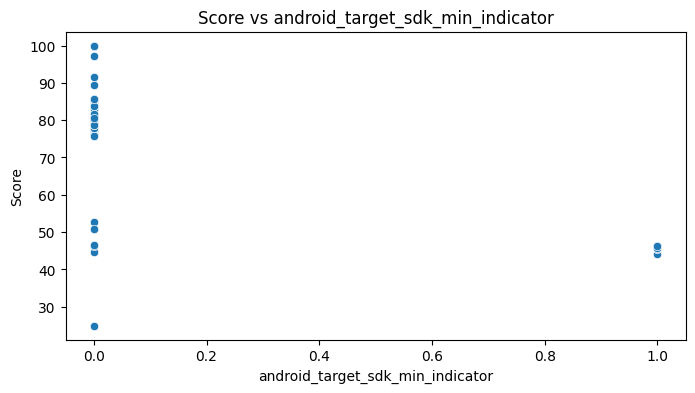

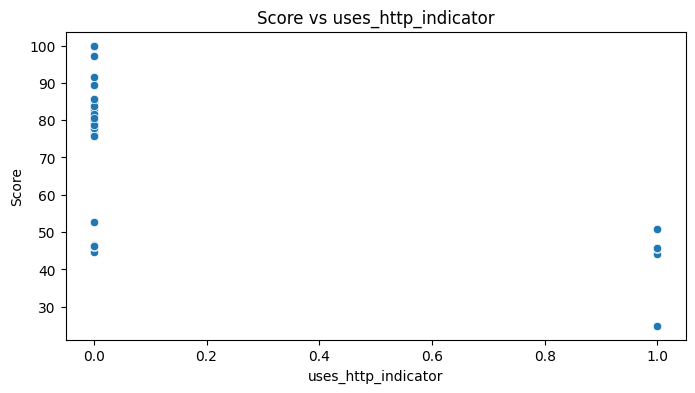

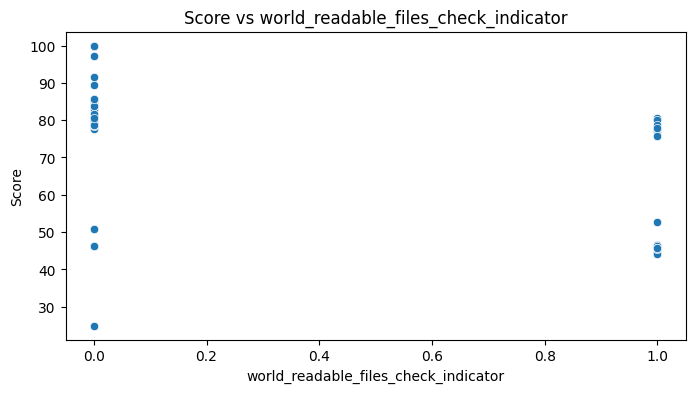

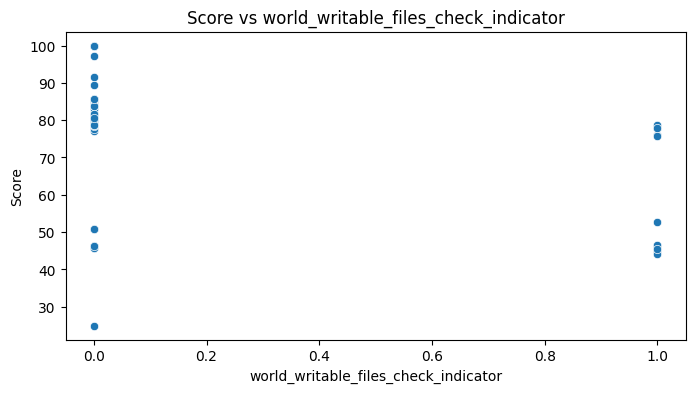

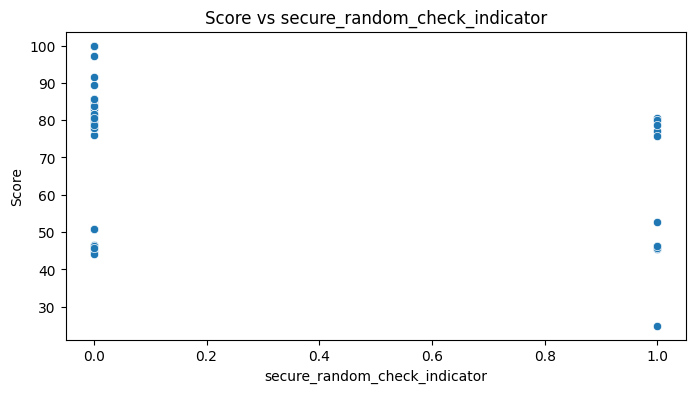

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 5 features with the highest absolute correlation (excluding 'Score' itself)
top_features = correlations.drop('Score').apply(abs).nlargest(5).index

# Create scatterplots for these features
for feature in top_features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=apps_scores, x=feature, y='Score')
    plt.title(f'Score vs {feature}')
    plt.show()


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np
# Separate features and target
X = final.drop(columns=['Score', 'App_Title'])
y = final['Score']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42,n_estimators=5),
    "XGBoost": XGBRegressor(random_state=42)
}

# Train and evaluate the models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Compute metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name}:")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  Mean Absolute Error: {mae:.2f}")
    print(f"  R^2 Score: {r2:.2f}")
    print()


Linear Regression:
  Mean Squared Error: 127.66
  Mean Absolute Error: 8.13
  R^2 Score: 0.64

Random Forest:
  Mean Squared Error: 81.83
  Mean Absolute Error: 4.31
  R^2 Score: 0.77

XGBoost:
  Mean Squared Error: 87.61
  Mean Absolute Error: 4.73
  R^2 Score: 0.75



In [ ]:
# Random forest performs best, do some hyper parameter tuning

  Mean Squared Error: 69.04
  Mean Absolute Error: 4.56
  R^2 Score: 0.81



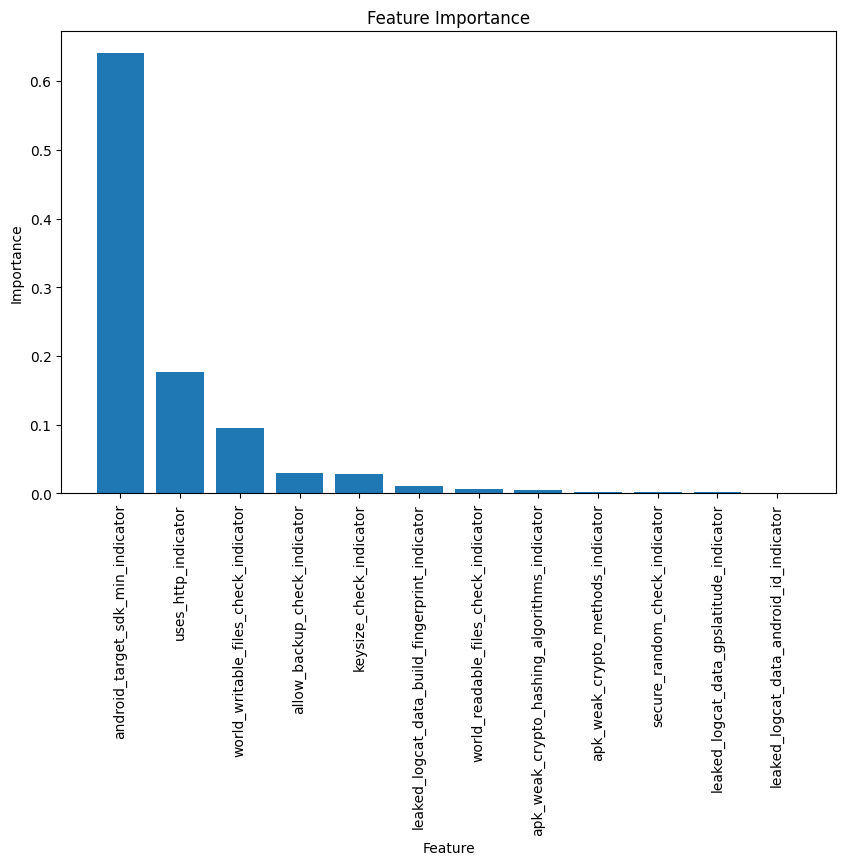

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model from grid search
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"  Mean Squared Error: {mse:.2f}")
print(f"  Mean Absolute Error: {mae:.2f}")
print(f"  R^2 Score: {r2:.2f}")
print()

# Get the feature importances from the best model
feature_importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance plot
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()
